# inspect Med Sea CROCO simulation

In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

import pynsitu as pin
crs = pin.maps.crs

import gstools as gs
from xhistogram.xarray import histogram

In [2]:
nc = "/home/datawork-lops-oc/MED/final_dataset/cswot2023/croco/MENOR400_CSWOT.nc"
ds = xr.open_dataset(nc)

In [13]:
ds["time_counter"]

<xarray.DataArray 'time_counter' (time_counter: 1597)>
array(['2023-03-14T01:00:00.000000000', '2023-03-14T02:00:00.000000000',
       '2023-03-14T03:00:00.000000000', ..., '2023-05-19T11:00:00.000000000',
       '2023-05-19T12:00:00.000000000', '2023-05-19T13:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_instant  (time_counter) datetime64[ns] ...
  * time_counter  (time_counter) datetime64[ns] 2023-03-14T01:00:00 ... 2023-...
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    bounds:         time_counter_bounds

In [3]:
ds

<xarray.Dataset>
Dimensions:              (y_1point: 1, x_1point: 1, s_rho: 80, s_w: 81,
                          y_rho: 1201, x_rho: 1000, y_u: 1201, x_u: 1000,
                          y_v: 1201, x_v: 1000, y_w: 1201, x_w: 1000,
                          time_counter: 1597, axis_nbounds: 2)
Coordinates: (12/14)
    nav_lat_1point       (y_1point, x_1point) float32 ...
    nav_lon_1point       (y_1point, x_1point) float32 ...
  * s_rho                (s_rho) float32 -0.9937 -0.9812 ... -0.01875 -0.00625
  * s_w                  (s_w) float32 -1.0 -0.9875 -0.975 ... -0.0125 0.0
    nav_lat_rho          (y_rho, x_rho) float32 ...
    nav_lon_rho          (y_rho, x_rho) float32 ...
    ...                   ...
    nav_lat_v            (y_v, x_v) float32 ...
    nav_lon_v            (y_v, x_v) float32 ...
    nav_lat_w            (y_w, x_w) float32 ...
    nav_lon_w            (y_w, x_w) float32 ...
    time_instant         (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2023-03-14T01:00:00 .....
Dimensions without coordinates: y_1point, x_1point, y_rho, x_rho, y_u, x_u,
                                y_v, x_v, y_w, x_w, axis_nbounds
Data variables: (12/24)
    hc                   (y_1point, x_1point) float32 ...
    theta_s              (y_1point, x_1point) float32 ...
    theta_b              (y_1point, x_1point) float32 ...
    Tcline               (y_1point, x_1point) float32 ...
    Vtransform           (y_1point, x_1point) float32 ...
    Cs_r                 (s_rho, y_1point, x_1point) float32 ...
    ...                   ...
    zeta                 (time_counter, y_rho, x_rho) float32 ...
    temp                 (time_counter, s_rho, y_rho, x_rho) float32 ...
    salt                 (time_counter, s_rho, y_rho, x_rho) float32 ...
    rho                  (time_counter, s_rho, y_rho, x_rho) float32 ...
    visc3d               (time_counter, s_rho, y_rho, x_rho) float32 ...
    Akt                  (time_counter, s_w, y_w, x_w) float32 ...
Attributes:
    name:         /home1/scratch/pgarreau/croco_xios_MENOR400_his_restarted
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Dec-08 03:12:46 GMT

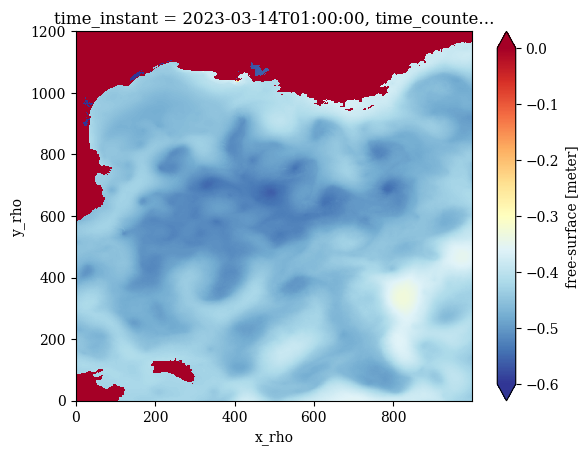

In [16]:
zeta = ds["zeta"].isel(time_counter=0)
zeta.plot(vmin=-.6, vmax=0., cmap="RdYlBu_r")

In [14]:
zeta_m = ds["zeta"].isel(time_counter=slice(0,None,24)).mean("time_counter")

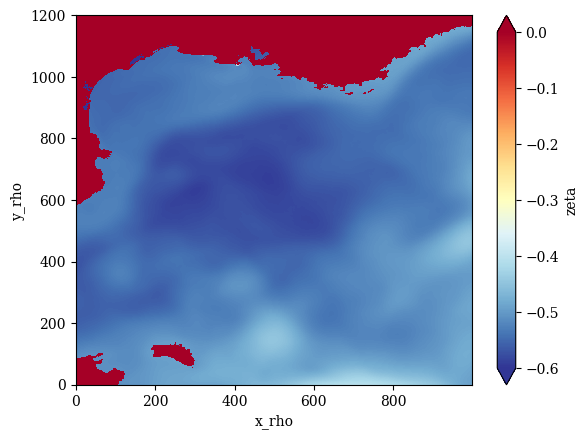

In [17]:
zeta_m.plot(vmin=-.6, vmax=0., cmap="RdYlBu_r")

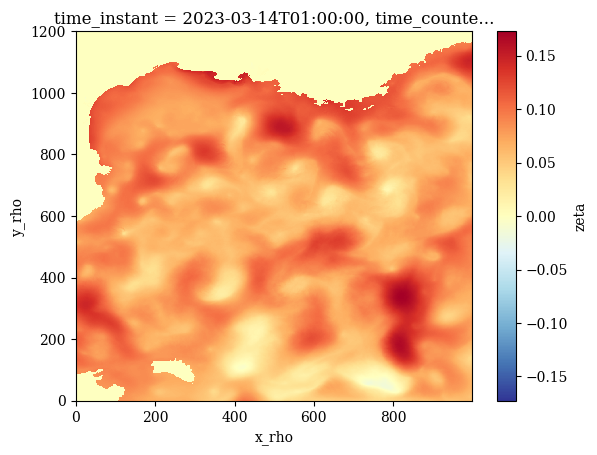

In [19]:
(zeta-zeta_m).plot(cmap="RdYlBu_r")

In [5]:
ds["time_counter"]

<xarray.DataArray 'time_counter' (time_counter: 1597)>
array(['2023-03-14T01:00:00.000000000', '2023-03-14T02:00:00.000000000',
       '2023-03-14T03:00:00.000000000', ..., '2023-05-19T11:00:00.000000000',
       '2023-05-19T12:00:00.000000000', '2023-05-19T13:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_instant  (time_counter) datetime64[ns] ...
  * time_counter  (time_counter) datetime64[ns] 2023-03-14T01:00:00 ... 2023-...
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    bounds:         time_counter_bounds

In [4]:
ds["zeta"]

<xarray.DataArray 'zeta' (time_counter: 1597, y_rho: 1201, x_rho: 1000)>
[1917997000 values with dtype=float32]
Coordinates:
    nav_lat_rho   (y_rho, x_rho) float32 ...
    nav_lon_rho   (y_rho, x_rho) float32 ...
    time_instant  (time_counter) datetime64[ns] ...
  * time_counter  (time_counter) datetime64[ns] 2023-03-14T01:00:00 ... 2023-...
Dimensions without coordinates: y_rho, x_rho
Attributes:
    long_name:           free-surface
    units:               meter
    online_operation:    instant
    interval_operation:  45 s
    interval_write:      1 h
    cell_methods:        time: point (interval: 45 s)